In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import

In [2]:
test = pd.read_excel(r'C:\Users\Work\Downloads\Test_set.xlsx')

In [3]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
data=pd.read_excel(r'C:\Users\Work\Downloads\Data_Train.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
print('Shape train data {}'.format(data.shape))
print('Shape test data  {}'.format(test.shape))

Shape train data (10683, 11)
Shape test data  (2671, 10)


## Data Preproccessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.Date_of_Journey.value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

<b>Extracting Journey day and Juorney Month from Date of Journey column because model do not accept dates in date format.<br>
We do not need to etract year bcoz data is only for one year and that is 2019    

In [9]:
data['Journey Day']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [10]:
data['Journey month']=pd.to_datetime(data['Date_of_Journey'],format='%d/%m/%Y').dt.month 


In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<b>Now we do not require "Date_of_Journey" since we have splitted the column into Journey day and Journey month.<br>

In [12]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


<b>Smilarly extarcting dep_hr and dep_min columns from "Dep_Time"<br>

In [14]:
data['dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour

In [15]:
data['dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [16]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [17]:
data.drop('Dep_Time',axis=1,inplace=True)

In [18]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
data.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

<b>Data values in Arrival_Time are in two format.</b>
1) Only Time<br>
2) Time with Date<br>

This creates trouble in splitting column in "Arr_hr" and "Arr_min" like we did earlier in dep_Time.<br>
Here first we need to split Arr_Time into "arr_date" and "arr_time" and then split "arr_time" into "arr_hr" and "arr_min".<br>
After that drop "arr_date" and "arr_time".<br>

In [20]:
data[['arr_time','arr_date']] = data.Arrival_Time.str.split(n=1,expand=True)

In [21]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_time,arr_date
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01:10,22 Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13:15,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,04:25,10 Jun
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23:30,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21:35,None


In [22]:
data.drop('arr_date',axis=1,inplace=True)

In [23]:
data['arr_hr']=pd.to_datetime(data['arr_time']).dt.hour
data['arr_min']=pd.to_datetime(data['arr_time']).dt.minute

In [24]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_time,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,01:10,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13:15,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,04:25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23:30,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21:35,21,35


In [25]:
data.drop('arr_time',axis=1,inplace=True)

In [26]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
data.drop('Arrival_Time',axis=1,inplace=True)

#### Similarly split Duration column into duration_hr and duration_min

In [28]:
data[['duration_hr','duration_min']]=data.Duration.str.split(n=1,expand=True)

In [29]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19h,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4h,45m


Now Drop units 'h' for hour anf 'm' for minute from duration_hr and 'duration_min'

In [30]:
data['duration_hr'] = data['duration_hr'].str.replace(r'\D', '')


C:\Users\Work\AppData\Local\Temp/ipykernel_12660/1828120536.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['duration_hr'] = data['duration_hr'].str.replace(r'\D', '')


In [31]:
data['duration_min'] = data['duration_min'].str.replace(r'\D', '')


C:\Users\Work\AppData\Local\Temp/ipykernel_12660/552848168.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['duration_min'] = data['duration_min'].str.replace(r'\D', '')


In [32]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
data.drop('Duration',axis=1,inplace=True)

In [34]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [35]:
data1=data.copy()

In [36]:
data=data1.copy()

In [37]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Journey Day      10683 non-null  int64 
 8   Journey month    10683 non-null  int64 
 9   dep_hr           10683 non-null  int64 
 10  dep_min          10683 non-null  int64 
 11  arr_hr           10683 non-null  int64 
 12  arr_min          10683 non-null  int64 
 13  duration_hr      10683 non-null  object
 14  duration_min     9651 non-null   object
dtypes: int64(7), object(8)
memory usage: 1.2+ MB


In [39]:
data['duration_min']=data['duration_min'].replace(np.nan,0)

In [40]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [41]:
data['duration_min']=data['duration_min'].astype(int)
data['duration_hr']=data['duration_hr'].astype(int)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Journey Day      10683 non-null  int64 
 8   Journey month    10683 non-null  int64 
 9   dep_hr           10683 non-null  int64 
 10  dep_min          10683 non-null  int64 
 11  arr_hr           10683 non-null  int64 
 12  arr_min          10683 non-null  int64 
 13  duration_hr      10683 non-null  int32 
 14  duration_min     10683 non-null  int32 
dtypes: int32(2), int64(7), object(6)
memory usage: 1.1+ MB


In [43]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### DATA VISUALISATION

C:\Users\Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

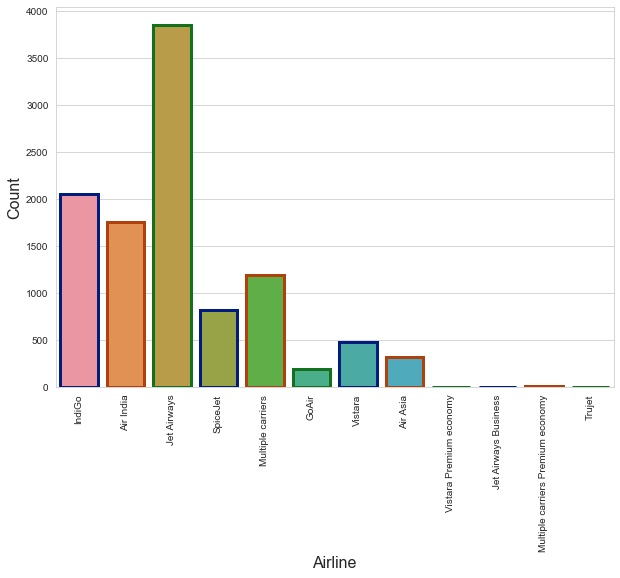

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot('Airline',data=data,linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=90)
plt.xlabel('Airline',fontsize=16)
plt.ylabel('Count',fontsize=16)

C:\Users\Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

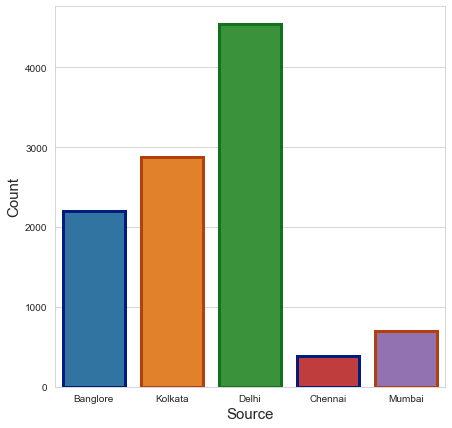

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
sns.countplot('Source',data=data,linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Source',fontsize=15)
plt.ylabel('Count',fontsize=15)


C:\Users\Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

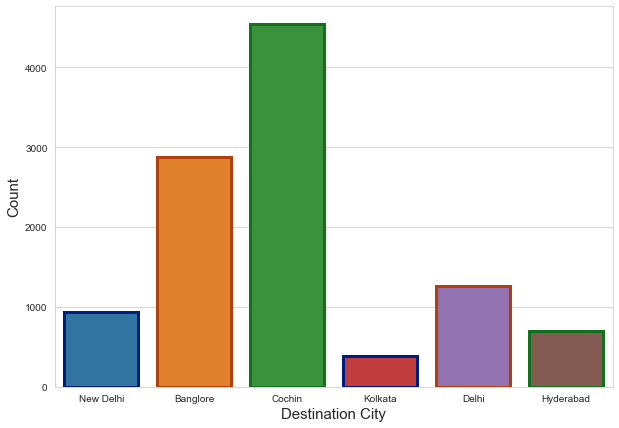

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot('Destination',data=data,linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Count',fontsize=15)


C:\Users\Work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

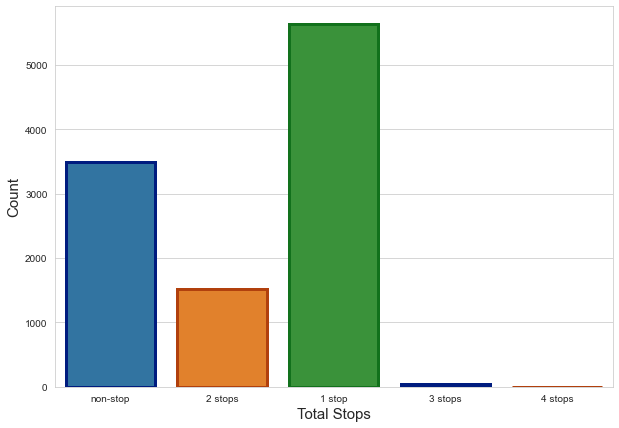

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot('Total_Stops',data=data,linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Total Stops',fontsize=15)
plt.ylabel('Count',fontsize=15)


In [48]:
data.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

Text(0, 0.5, 'Count')

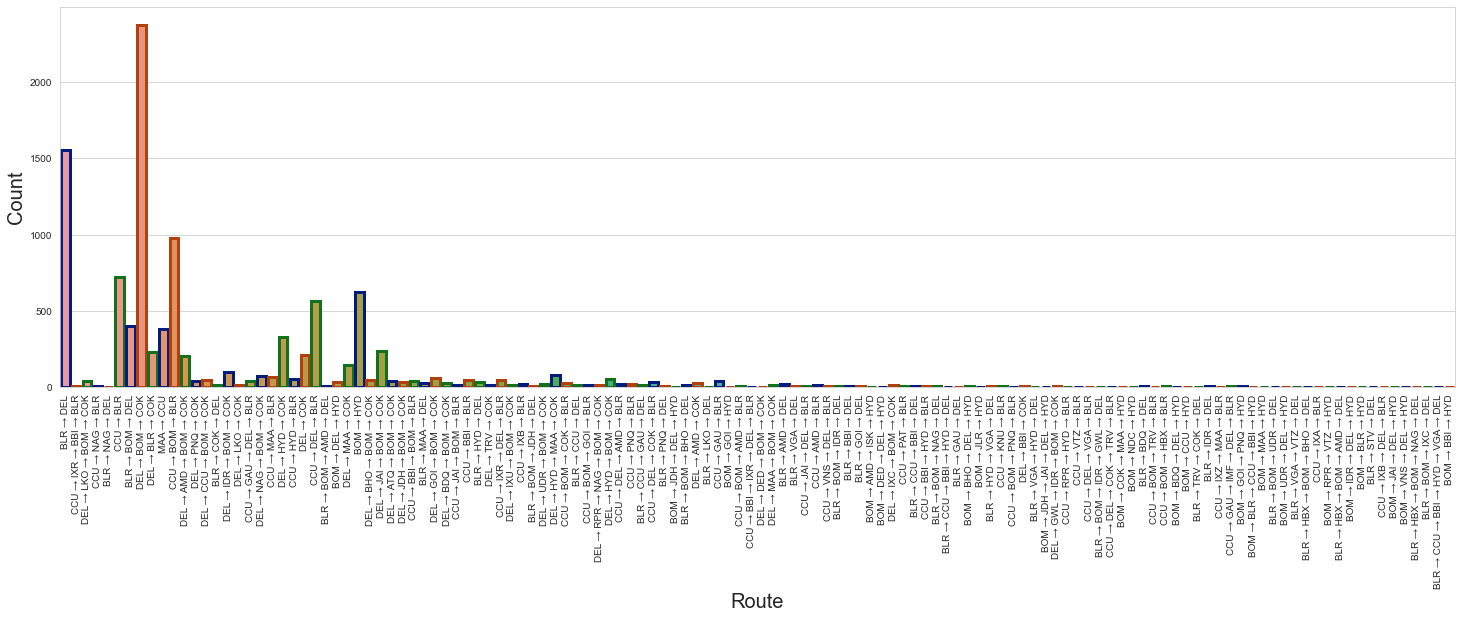

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,7))
sns.countplot(x='Route',data=data,linewidth=3,edgecolor=sns.color_palette("dark", 3))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Route',fontsize=20)
plt.ylabel('Count',fontsize=20)

Text(0, 0.5, 'Price')

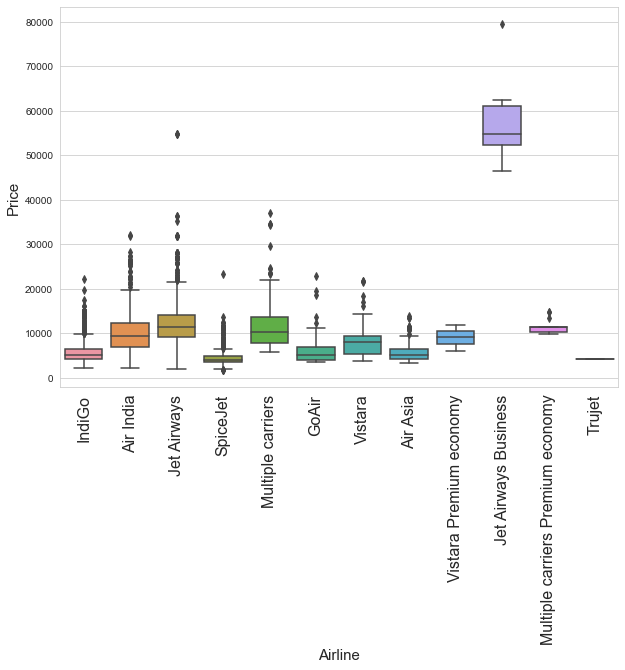

In [50]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Airline',fontsize=10)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)

Text(0, 0.5, 'Price')

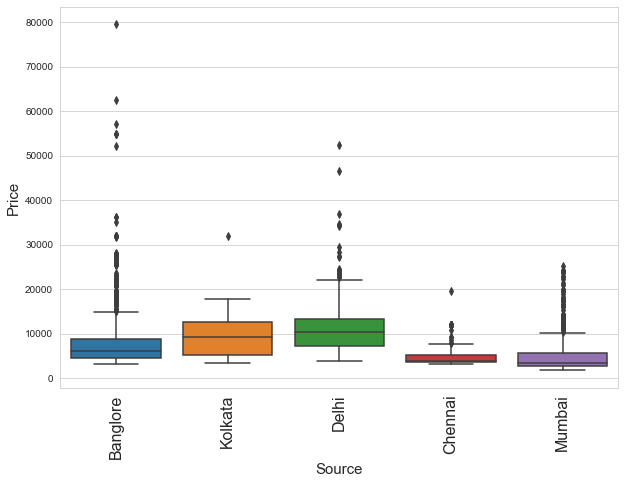

In [51]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Source',y='Price',data=data)
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Source',fontsize=15)
plt.ylabel('Price',fontsize=15)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

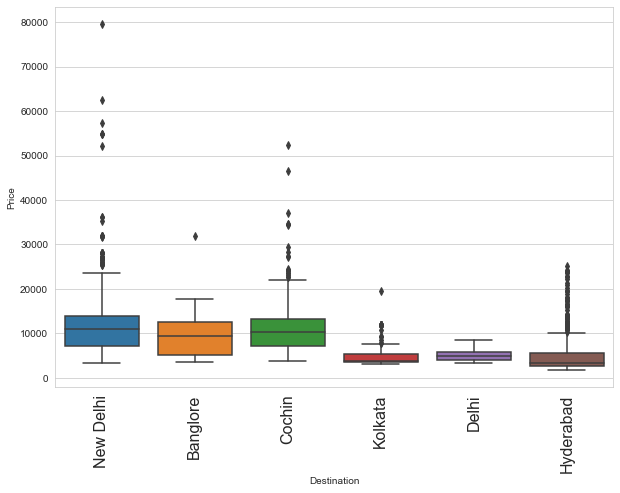

In [52]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Destination',y='Price',data=data)
plt.xticks(rotation=90,fontsize=16)

Text(0, 0.5, 'Price')

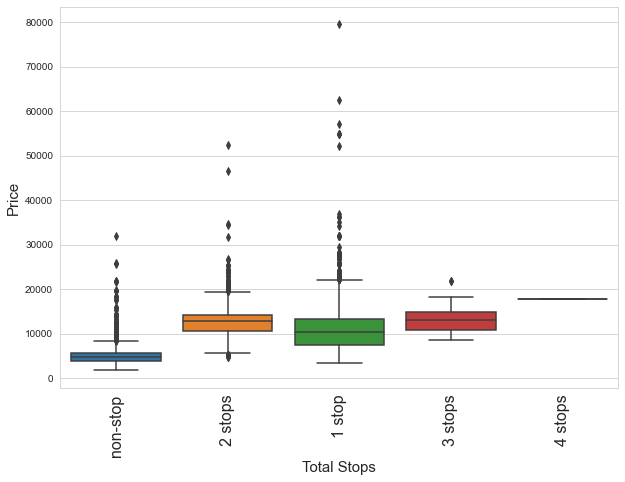

In [53]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Total_Stops',y='Price',data=data)
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Total Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)

Text(0, 0.5, 'Density')

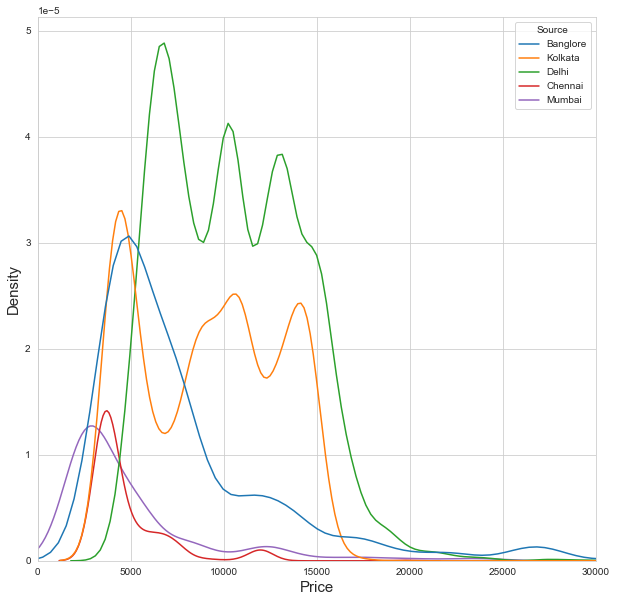

In [54]:
plt.figure(figsize=(10,10))
sns.kdeplot(data['Price'],data=data,hue='Source')
plt.xlim(left=0,right=30000)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Density',fontsize=15)

Text(0, 0.5, 'Density')

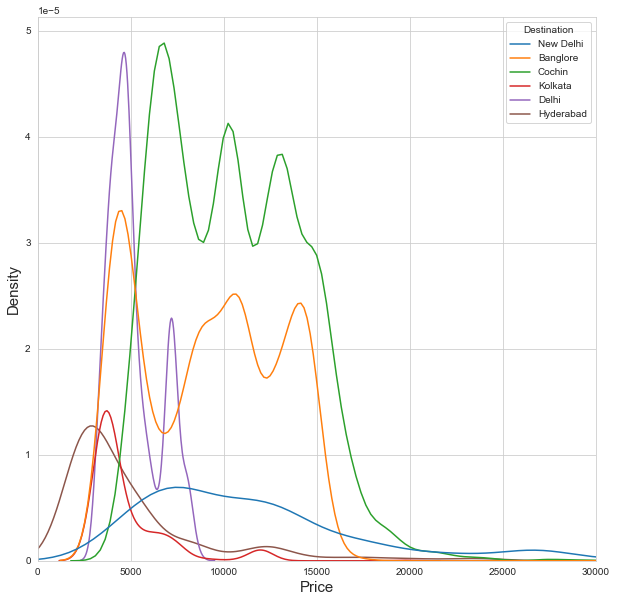

In [55]:
plt.figure(figsize=(10,10))
sns.kdeplot(data['Price'],data=data,hue='Destination')
plt.xlim(left=0,right=30000)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Density',fontsize=15)

C:\Users\Work\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

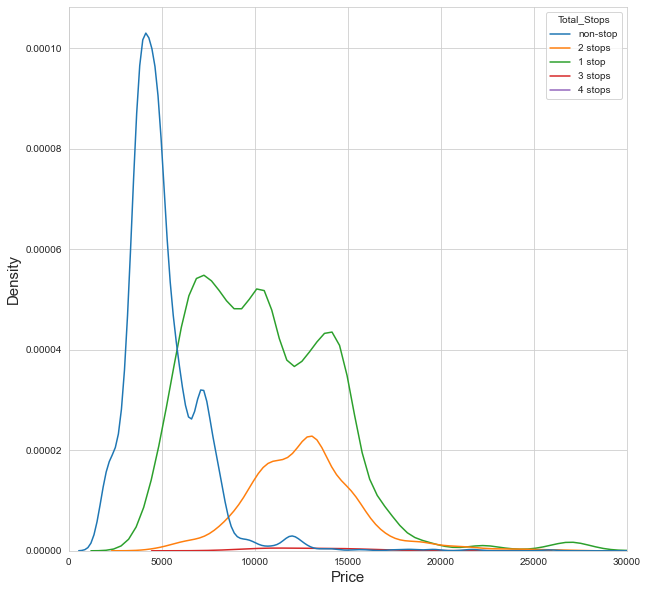

In [56]:
plt.figure(figsize=(10,10))
sns.kdeplot(data['Price'],data=data,hue='Total_Stops')
plt.xlim(left=0,right=30000)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Density',fontsize=15)

C:\Users\Work\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

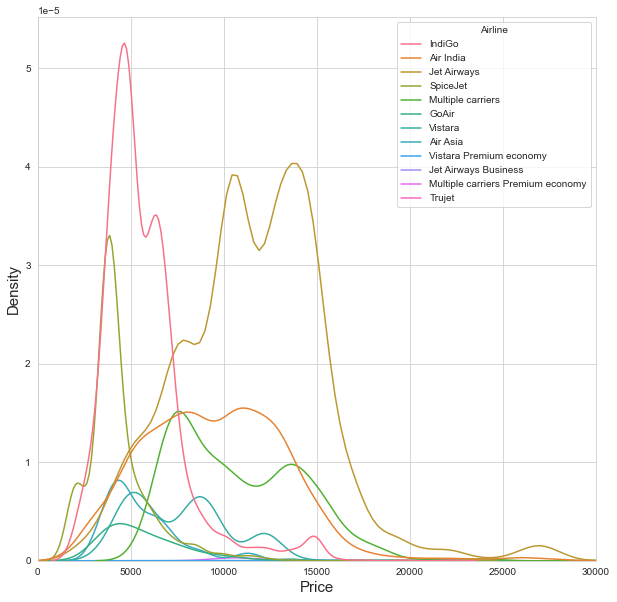

In [57]:
plt.figure(figsize=(10,10))
sns.kdeplot(data['Price'],data=data,hue='Airline')
plt.xlim(left=0,right=30000)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Density',fontsize=15)


Text(0, 0.5, 'Price')

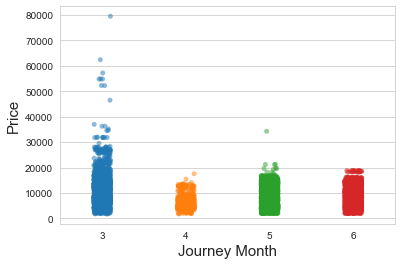

In [58]:
sns.stripplot(x='Journey month',y='Price',data=data,alpha=0.5)
plt.xlabel('Journey Month',fontsize=15)
plt.ylabel('Price',fontsize=15)

Text(0, 0.5, 'Price')

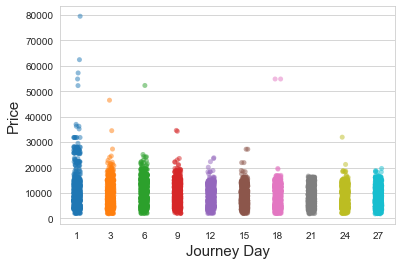

In [59]:
sns.stripplot(x='Journey Day',y='Price',data=data,alpha=0.5,linewidth=0,size=5,edgecolor='green')
plt.xlabel('Journey Day',fontsize=15)
plt.ylabel('Price',fontsize=15)

Text(0, 0.5, 'Price')

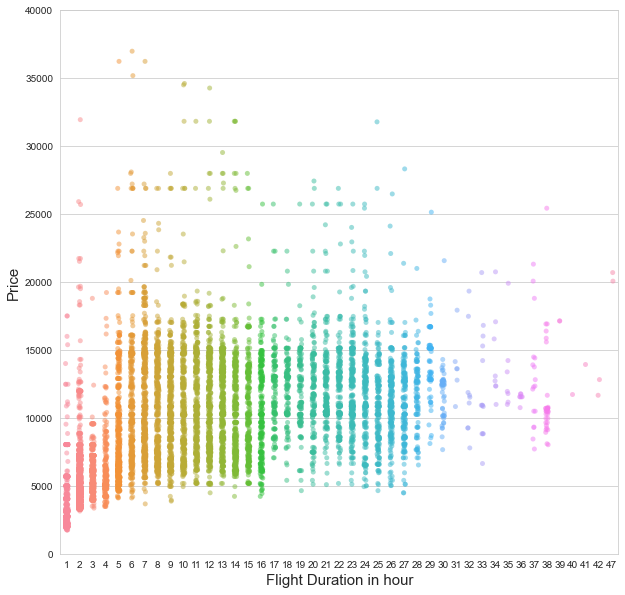

In [60]:
plt.figure(figsize=(10,10))
sns.stripplot(x='duration_hr',y='Price',data=data,alpha=0.5,linewidth=0,size=5,edgecolor='green')
plt.ylim(0,40000)
plt.xlabel('Flight Duration in hour',fontsize=15)
plt.ylabel('Price',fontsize=15)

## One Hot Encoding

In [61]:
airline_dummies=pd.get_dummies(data['Airline'],drop_first=True)

In [62]:
airline_dummies.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [63]:
data.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [64]:
source_dummies = pd.get_dummies(data['Source'],drop_first=True)

In [65]:
source_dummies.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [66]:
data.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [67]:
destination_dummies = pd.get_dummies(data['Destination'],drop_first=True)

In [68]:
destination_dummies.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [69]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [70]:
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [71]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,16,50,21,35,4,45


In [72]:
data.dropna(inplace=True)

In [73]:
data['Total_Stops']=data.Total_Stops.astype(int)

In [74]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [75]:
data=pd.concat([airline_dummies,source_dummies,destination_dummies,data],axis=1)

In [76]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0


In [77]:
data.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

In [78]:
data.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0
1,1,0,0,0,0,0,0,0,0,0,...,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7.0,25.0
2,0,0,0,1,0,0,0,0,0,0,...,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19.0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5.0,25.0
4,0,0,1,0,0,0,0,0,0,0,...,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4.0,45.0


In [79]:
data.isnull().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Total_Stops                          1
Price                                1
Journey Day                          1
Journey month                        1
dep_hr                               1
dep_min                  

In [80]:
data.dropna(inplace=True)

## Applying all preprocessing steps to test data also. 

In [81]:
test['Journey Day']=pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.day  
test['Journey month']=pd.to_datetime(test['Date_of_Journey'],format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey',axis=1,inplace=True)

test['dep_hr']=pd.to_datetime(test['Dep_Time']).dt.hour
test['dep_min']=pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time',axis=1,inplace=True)


test[['arr_time','arr_date']] = test.Arrival_Time.str.split(n=1,expand=True)
test.drop('arr_date',axis=1,inplace=True)
test['arr_hr']=pd.to_datetime(test['arr_time']).dt.hour
test['arr_min']=pd.to_datetime(test['arr_time']).dt.minute
test.drop('arr_time',axis=1,inplace=True)
test.drop('Arrival_Time',axis=1,inplace=True)

test[['duration_hr','duration_min']]=test.Duration.str.split(n=1,expand=True)
test['duration_hr'] = test['duration_hr'].str.replace(r'\D', '')
test['duration_min'] = test['duration_min'].str.replace(r'\D', '')
test.drop('Duration',axis=1,inplace=True)
test['duration_min']=test['duration_min'].replace(np.nan,0)

test['duration_min']=test['duration_min'].astype(int)
test['duration_hr']=test['duration_hr'].astype(int)

airline_dummies_test=pd.get_dummies(test['Airline'],drop_first=True)
destination_dummies_test = pd.get_dummies(test['Destination'],drop_first=True)
source_dummies_test = pd.get_dummies(test['Source'],drop_first=True)
test['Total_Stops'] = test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

test=pd.concat([airline_dummies_test,source_dummies_test,destination_dummies_test,test],axis=1)
test.drop(['Airline','Source','Destination','Additional_Info','Route'],axis=1,inplace=True)

test.head()

C:\Users\Work\AppData\Local\Temp/ipykernel_12660/1405138614.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  test['duration_hr'] = test['duration_hr'].str.replace(r'\D', '')
C:\Users\Work\AppData\Local\Temp/ipykernel_12660/1405138614.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  test['duration_min'] = test['duration_min'].str.replace(r'\D', '')


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,New Delhi,Total_Stops,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,6,20,10,20,4,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,24,6,23,55,2,45,2,50


In [82]:
test.shape

(2671, 28)

## Feature Selection

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Price',axis=1),data['Price'],random_state=42,test_size=0.3)

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
ex_regressor = ExtraTreesRegressor()

In [87]:
ex_regressor.fit(x_train,y_train)

ExtraTreesRegressor()

In [88]:
ex_regressor.feature_importances_

array([1.16095640e-02, 1.65107833e-03, 1.54660512e-02, 1.31748675e-01,
       7.74237821e-02, 2.29638612e-02, 9.99310239e-04, 2.76709943e-03,
       1.30712869e-04, 4.96803144e-03, 7.82256601e-05, 4.92068852e-04,
       7.47161468e-03, 3.06395472e-03, 6.13515927e-03, 6.36330488e-03,
       1.84439806e-02, 8.18418781e-03, 4.34418492e-04, 1.95073023e-02,
       2.07176745e-01, 1.39864657e-01, 5.16958525e-02, 2.51599221e-02,
       2.31497296e-02, 2.95223149e-02, 2.11064689e-02, 1.41357866e-01,
       2.10640609e-02])

In [89]:
ser = pd.Series(ex_regressor.feature_importances_,index=x_train.columns)

In [90]:
ser

Air India                            0.011610
GoAir                                0.001651
IndiGo                               0.015466
Jet Airways                          0.131749
Jet Airways Business                 0.077424
Multiple carriers                    0.022964
Multiple carriers Premium economy    0.000999
SpiceJet                             0.002767
Trujet                               0.000131
Vistara                              0.004968
Vistara Premium economy              0.000078
Chennai                              0.000492
Delhi                                0.007472
Kolkata                              0.003064
Mumbai                               0.006135
Cochin                               0.006363
Delhi                                0.018444
Hyderabad                            0.008184
Kolkata                              0.000434
New Delhi                            0.019507
Total_Stops                          0.207177
Journey Day                       

<AxesSubplot:title={'center':'Feature Importance '}>

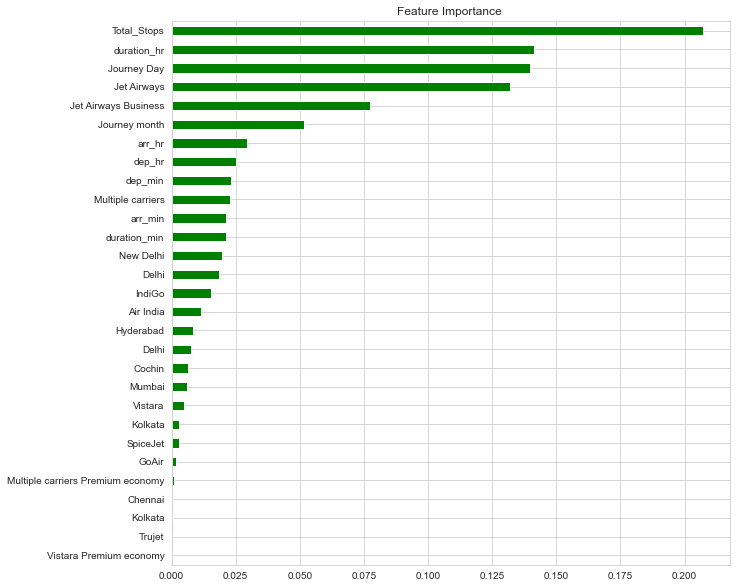

In [91]:
plt.figure(figsize=(10,10))
ser.sort_values(ascending=True).plot(kind='barh',color='green',grid=True,title="Feature Importance ")

## Model Building

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [94]:
reg_RF= RandomForestRegressor()

In [95]:
reg_RF.fit(x_train,y_train)
y_pred_rf = reg_RF.predict(x_test)

In [96]:
reg_RF.score(x_train,y_train)

0.9558012152925102

In [97]:
print('Mean Squared error             : {} ' .format(mean_squared_error(y_test,y_pred_rf)))
print('Mean absolute %  Squared error : {} ' .format(mean_absolute_percentage_error(y_test,y_pred_rf)))
print('Root Mean Squared error        : {} ' .format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print('r2 score                       : {} ' .format(r2_score(y_test,y_pred_rf)))

Mean Squared error             : 4015172.7696607183 
Mean absolute %  Squared error : 0.13045697267067724 
Root Mean Squared error        : 2003.789602144077 
r2 score                       : 0.8031867447760775 


In [98]:
sns.set_style('darkgrid')

(10000.0, -10000.0)

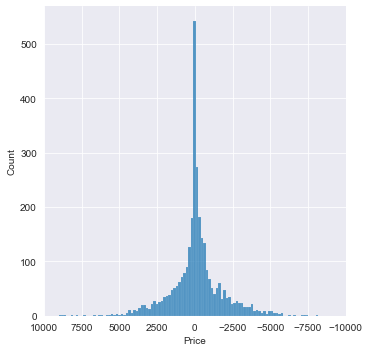

In [99]:
sns.displot(y_test-y_pred_rf)
plt.xlim(right=-10000,left=10000)

Text(0, 0.5, 'y_pred_rf')

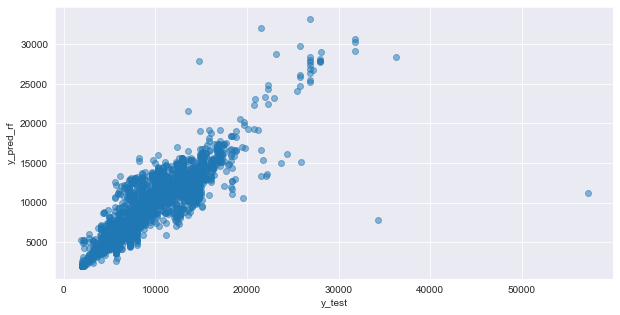

In [100]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred_rf,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_rf')

### Hyper Parameter Optimisation

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features =['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_leaf=[1,2,4,6,8]
min_samples_split=[2,5,10,14]

random_grid = {'n_estimators'    :n_estimators,
              'max_features'     :max_features,
              'max_depth'        :max_depth,
              'min_samples_leaf' : min_samples_leaf,
              'min_samples_split': min_samples_split,
              'criterion' : ["squared_error", "absolute_error", "poisson"]}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 5, 10, 14], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [105]:
RF_best=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,n_iter=10,n_jobs=-1,cv=3,verbose=12,random_state=42)

In [106]:
RF_best.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                        

In [107]:
RF_best.best_estimator_

RandomForestRegressor(max_depth=780, max_features='sqrt', min_samples_split=10,
                      n_estimators=1400)

In [108]:
RF_random=RF_best.best_estimator_

In [109]:
y_pred_random=RF_random.predict(x_test)

In [110]:
RF_random.score(x_train,y_train)

0.8794163377310875

In [111]:
print('Mean Squared error             : {} ' .format(mean_squared_error(y_test,y_pred_random)))
print('Mean absolute %  Squared error : {} ' .format(mean_absolute_percentage_error(y_test,y_pred_random)))
print('Root Mean Squared error        : {} ' .format(np.sqrt(mean_squared_error(y_test,y_pred_random))))
print('r2 score                       : {} ' .format(r2_score(y_test,y_pred_random)))

Mean Squared error             : 3551726.88608566 
Mean absolute %  Squared error : 0.14444768813815576 
Root Mean Squared error        : 1884.602580409371 
r2 score                       : 0.8259036484310706 


(10000.0, -10000.0)

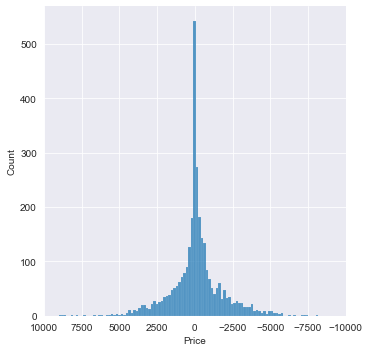

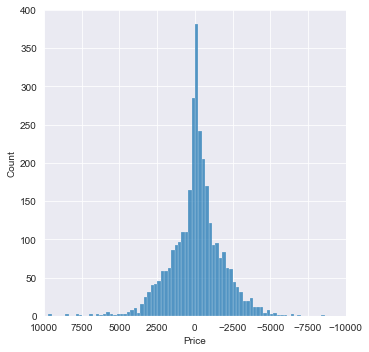

In [112]:

sns.displot(y_test-y_pred_rf)
plt.xlim(right=-10000,left=10000)


sns.displot(y_test-y_pred_random)
plt.xlim(right=-10000,left=10000)

Text(0, 0.5, 'y_pred_rf')

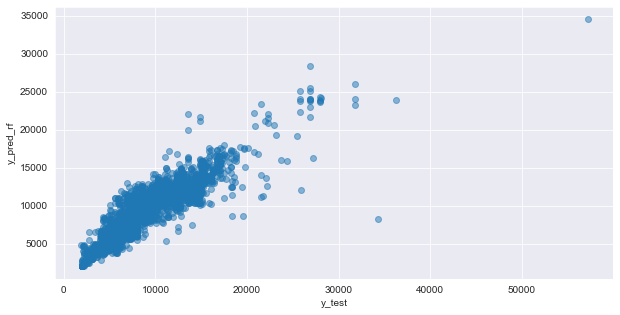

In [113]:
plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=y_pred_random,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred_rf')

### Now lets Try feature selection by mutual information gain


In [368]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [369]:
info = mutual_info_regression(x_train,y_train)

In [370]:
info

array([0.27935954, 0.04707397, 0.36482652, 0.52419679, 0.00900563,
       0.25616726, 0.        , 0.18853548, 0.00707407, 0.12237107,
       0.01304515, 0.1443597 , 0.50925106, 0.42822317, 0.19007722,
       0.50413235, 0.31491038, 0.19633998, 0.12254846, 0.16908922,
       0.76994128, 0.33779054, 0.59212945, 0.82734989, 0.6878855 ,
       1.05957585, 0.85664987, 1.04885941, 0.62793879])

In [371]:
info = pd.Series(info,index=x_train.columns)

In [372]:
info

Air India                            0.279360
GoAir                                0.047074
IndiGo                               0.364827
Jet Airways                          0.524197
Jet Airways Business                 0.009006
Multiple carriers                    0.256167
Multiple carriers Premium economy    0.000000
SpiceJet                             0.188535
Trujet                               0.007074
Vistara                              0.122371
Vistara Premium economy              0.013045
Chennai                              0.144360
Delhi                                0.509251
Kolkata                              0.428223
Mumbai                               0.190077
Cochin                               0.504132
Delhi                                0.314910
Hyderabad                            0.196340
Kolkata                              0.122548
New Delhi                            0.169089
Total_Stops                          0.769941
Journey Day                       

In [373]:
info.sort_values(ascending=False)

arr_hr                               1.059576
duration_hr                          1.048859
arr_min                              0.856650
dep_hr                               0.827350
Total_Stops                          0.769941
dep_min                              0.687886
duration_min                         0.627939
Journey month                        0.592129
Jet Airways                          0.524197
Delhi                                0.509251
Cochin                               0.504132
Kolkata                              0.428223
IndiGo                               0.364827
Journey Day                          0.337791
Delhi                                0.314910
Air India                            0.279360
Multiple carriers                    0.256167
Hyderabad                            0.196340
Mumbai                               0.190077
SpiceJet                             0.188535
New Delhi                            0.169089
Chennai                           

In [375]:
best_24 = SelectKBest(mutual_info_regression,k=24)

In [376]:
best_24.fit(x_train,y_train)

SelectKBest(k=24,
            score_func=<function mutual_info_regression at 0x0000020D1BF945E0>)

In [377]:
best_24.get_support()

array([ True, False,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [378]:
x_train = x_train[x_train.columns[best_24.get_support()]]

In [379]:
x_train.head()

,Air India,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Delhi,Kolkata,...,New Delhi,Total_Stops,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
749,0,0,1,0,0,0,0,0,0,0,...,0,0.0,27.0,6.0,10.0,20.0,11.0,50.0,1.0,30.0
6077,0,0,0,0,1,0,0,0,0,1,...,0,0.0,21.0,6.0,17.0,10.0,19.0,40.0,2.0,30.0
2373,0,0,0,1,0,0,0,1,0,0,...,0,1.0,27.0,5.0,15.0,0.0,1.0,30.0,10.0,30.0
2442,0,0,0,0,0,0,0,0,0,1,...,0,1.0,9.0,5.0,22.0,40.0,10.0,40.0,12.0,0.0
5402,1,0,0,0,0,0,0,1,0,0,...,0,2.0,9.0,6.0,19.0,45.0,19.0,15.0,23.0,30.0


In [380]:
x_test = x_test[x_test.columns[best_24.get_support()]]

In [381]:
x_test.head()

,Air India,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Delhi,Kolkata,...,New Delhi,Total_Stops,Journey Day,Journey month,dep_hr,dep_min,arr_hr,arr_min,duration_hr,duration_min
6075,0,0,0,1,0,0,0,1,0,0,...,0,2.0,21.0,5.0,15.0,5.0,1.0,30.0,10.0,25.0
3544,0,0,0,0,0,0,0,1,0,0,...,0,1.0,3.0,6.0,10.0,35.0,19.0,35.0,9.0,0.0
9291,0,0,0,0,0,1,0,0,0,1,...,0,1.0,9.0,5.0,20.0,20.0,9.0,5.0,12.0,45.0
5032,0,1,0,0,0,0,1,0,0,0,...,0,0.0,24.0,5.0,14.0,45.0,17.0,5.0,2.0,20.0
2483,0,0,1,0,0,0,0,1,0,0,...,0,1.0,21.0,5.0,22.0,50.0,4.0,25.0,5.0,35.0


In [382]:
from sklearn.ensemble import RandomForestRegressor

In [383]:
RF = RandomForestRegressor()

In [384]:
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)

In [385]:
print('Mean Squared error             : {} ' .format(mean_squared_error(y_test,y_pred_rf)))
print('Mean absolute %  Squared error : {} ' .format(mean_absolute_percentage_error(y_test,y_pred_rf)))
print('Root Mean Squared error        : {} ' .format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print('r2 score                       : {} ' .format(r2_score(y_test,y_pred_rf)))

Mean Squared error             : 4401387.739396872 
Mean absolute %  Squared error : 0.12984649250330227 
Root Mean Squared error        : 2097.9484596616935 
r2 score                       : 0.7842554982841852 


In [116]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(RF_random)
 
# Load the pickled model
Saved_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
Saved_model.predict(x_test)

array([16498.69427807,  6026.73646533,  8609.93220915, ...,
        5768.50063322,  3116.42468291,  6893.78767123])